In [53]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap, to_hex
import json

pd.set_option("display.width", 1200)
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [46]:
with open("artist_list.json", "r") as f:
    x = json.load(f)

In [64]:
artists = sorted([i["name"] for i in x["data"]])
artists[:10]

['ANGRA',
 'Al Bowlly',
 'Al-Ahram Orchestra',
 'Alan Lomax',
 'Alceu Valença',
 'Alice In Chains',
 'Altemar Dutra',
 'Amadou & Mariam',
 'Amon Amarth',
 'Amália Rodrigues']

In [69]:
# My spotify artists:
df_artists = pd.read_csv("artists_countries_list.csv", sep = ";")

df_plot = df_artists.groupby(by = "country", as_index = False).agg({"name": "count", 
                                                                    "iso_code": "first"}).rename(columns = {"name": "freq"})

df_plot.sort_values("freq")

,country,freq,iso_code
20,Israel,1,ISR
18,Iraq,1,IRQ
17,India,1,IND
26,Mongolia,1,MNG
15,Greece,1,GRC
27,Mozambique,1,MOZ
30,Peru,1,PER
11,Faroe Islands,1,FRO
24,Kazakhstan,1,KAZ
10,Egypt,1,EGY


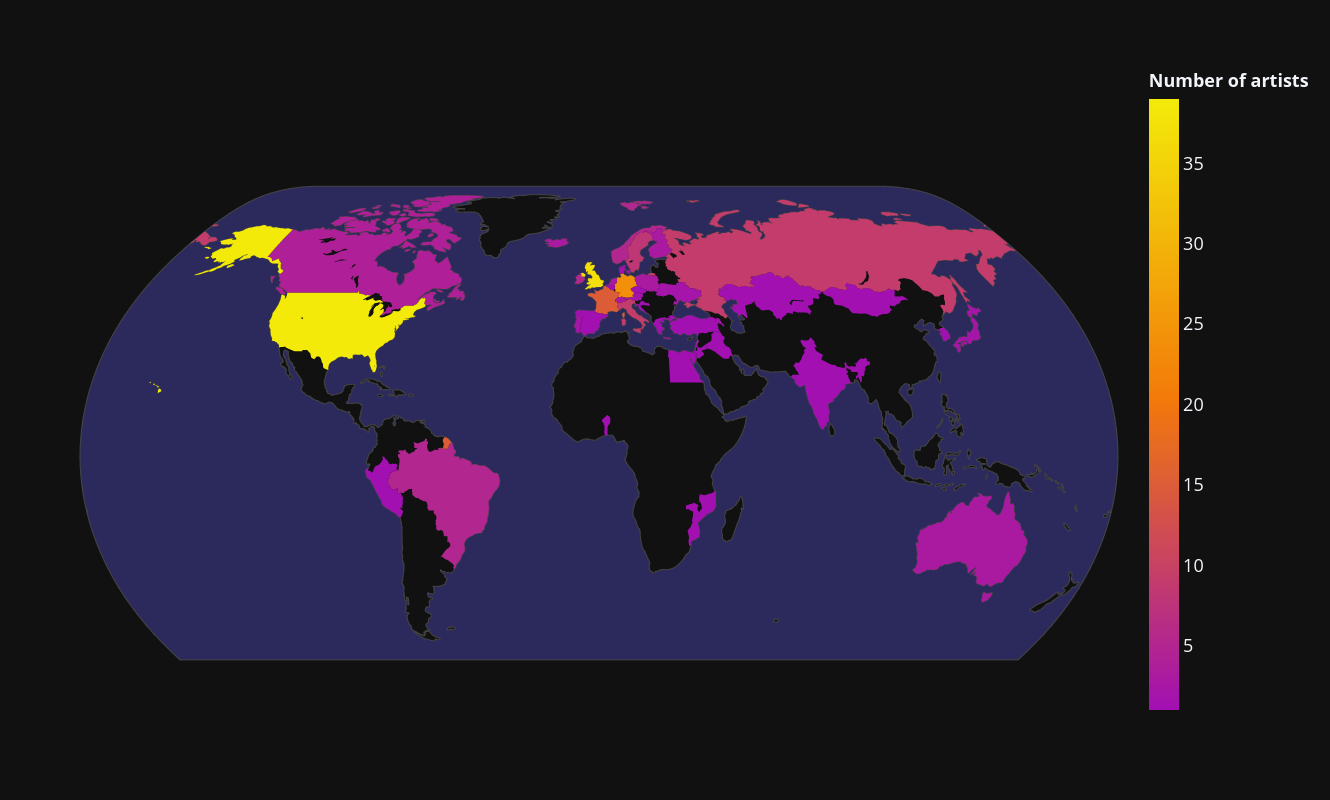

In [70]:
n_colors = 50
my_colors = ["#A210B2", "#F37A09", "#F3EF09"]
cmap = LinearSegmentedColormap.from_list("my_palette", my_colors)
my_palette = [to_hex(j) for j in [cmap(i/n_colors) for i in np.array(range(n_colors))]]
customdata = ["country", "freq"]

fig = px.choropleth(
    data_frame = df_plot,
    locations = "iso_code",
    color = "freq",
    color_continuous_scale = my_palette,
    custom_data = customdata,
    projection = "natural earth",
    template = "plotly_dark"
)
fig.update_traces(
    hovertemplate = "<b>%{customdata[0]}<br>" +
                    "Number of artists: %{customdata[1]:,.0f}</b><extra></extra>",
    marker_line_width = 0
)
fig.update_layout(
    coloraxis = {
        "colorbar": {
            "title": "<b>Number of artists</b>"
        }
    },
    font = dict(
        size = 18
    ),
    plot_bgcolor = "red",
    hoverlabel = dict(
        font_size = 18,
        font_family = "Rockwell"
    ),
    height = 800,
    geo_bgcolor = "rgba(0, 0, 0, 0)"
)
fig.update_geos(
    fitbounds = "locations",
    visible = True,
    showocean = True,
    oceancolor = "#2C2A5C"
)
fig.show()